In [25]:
#import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
import os
import requests
import plotly.express as px

from pathlib import Path
from dotenv import load_dotenv

In [26]:
# Load the Mapbox API access token from the .env file
load_dotenv()

True

In [27]:
# Create the Mapbox API access token variable
map_box_api_access_token = os.getenv("MAPBOX_API_ACCESS_TOKEN")

# Confirm that Mapbox API access token is available by checking the type
type(map_box_api_access_token)

str

In [28]:
# Set the Mapbox API access token to the users API key
px.set_mapbox_access_token(map_box_api_access_token)

In [29]:
# Using the `read_csv` function and Path module, read `us_ca_san_francisco-addresses-county` file 
# and create the Pandas DataFrame.
foreclosure_df = pd.read_csv(
    Path('../California_Real_Estate_Analysis/Resources/foreclosures.csv')
)

#Review the first and last five rows of the DataFrame
display(foreclosure_df.head())
display(foreclosure_df.tail())

,County,Address,City,Sq Ft,Beds,Baths,Est Value,Est Equity,Owner,Owner Occ?,Listed for Sale?,Foreclosure,Concatenated Address,Latitude,Longitude
0,Alameda,5110 Telegraph Ave,OAKLAND,NaN,NaN,NaN,"$1,329,300","$1,329,300",TELEGRAPH 2 NEUN OWNER LL,No,No,Yes,5110 Telegraph Ave OAKLAND CA,???,???
1,Alameda,11330 Lochard St,OAKLAND,NaN,NaN,NaN,"$450,000","-$1,255,698","OWENS,LILA V",No,No,Yes,11330 Lochard St OAKLAND CA,37.7471529,-122.1303771
2,Alameda,3317 Elm St 102,OAKLAND,"5,866",NaN,NaN,"$667,526","-$18,206","ERIK,HOUSH SEP",No,No,Yes,3317 Elm St 102 OAKLAND CA,???,???
3,Alameda,5401 Claremont Ave,OAKLAND,"2,299",3.0,2.5,"$2,528,200","$2,528,200",TRIUMPH REO ASSETS LLC,No,No,Yes,5401 Claremont Ave OAKLAND CA,37.8429686,-122.2575852
4,Alameda,1515 E 19Th St,OAKLAND,"1,123",2.0,1.0,"$689,300","-$14,576",L & L RESIDL PROP LLC,Yes,No,Yes,1515 E 19Th St OAKLAND CA,???,???


,County,Address,City,Sq Ft,Beds,Baths,Est Value,Est Equity,Owner,Owner Occ?,Listed for Sale?,Foreclosure,Concatenated Address,Latitude,Longitude
1440,Sonoma,182 Windsor River Rd,WINDSOR,"1,070",NaN,NaN,"$241,179","$241,179",MONSTRO LLC,No,No,Yes,182 Windsor River Rd WINDSOR CA,38.5473212,-122.8280792
1441,Sonoma,302 Northstar Ln,CLOVERDALE,"2,050",3.0,2.0,"$635,500","$295,212","SLOAN,JAC8UELINE C",Yes,No,Yes,302 Northstar Ln CLOVERDALE CA,38.7805741,-123.0167964
1442,Sonoma,30 Bloomfield Rd,SEBASTOPOL,800,2.0,1.0,"$598,600","$283,120",PSF REO LLC,No,No,Yes,30 Bloomfield Rd SEBASTOPOL CA,???,???
1443,Sonoma,1821 Kelly Pl,ROHNERT PARK,"2,342",4.0,3.0,"$731,100","$86,545","MULINDWA,JOSEPH M",Yes,No,Yes,1821 Kelly Pl ROHNERT PARK CA,???,???
1444,Sonoma,1810 Kyle Pl,ROHNERT PARK,"2,007",3.0,2.5,"$664,400","$107,333","MORALES,MARTIN & ROSELIA",No,No,Yes,1810 Kyle Pl ROHNERT PARK CA,???,???


In [30]:
# Using the `read_csv` function and Path module, read `us_ca_san_francisco-addresses-county` file 
# and create the Pandas DataFrame.
sales_SF = pd.read_csv(
    Path('../California_Real_Estate_Analysis/Resources/San_Francisco.csv'),
)

#Review the first and last five rows of the DataFrame
display(sales_SF.head())
display(sales_SF.tail())

,rank,property_id,address,latitude,longitude,price,currency,bedrooms,bathrooms,area_sqft,...,property_type,property_style,sold_date,status,mls_number,image_urls,description,input_url,property_url,listing_page_url
0,449,1271330,"2510 24th Ave, San Francisco, CA 94116",37.740660,-122.480623,1451000,USD,3.0,1.0,1250.0,...,Single Family Residential,Craftsman,02-03-2021,Closed,513147,https://ssl.cdn-redfin.com/photo/9/bigphoto/14...,Affordable DETACHED Parkside home built on wid...,https://www.redfin.com/city/17151/CA/San-Franc...,https://www.redfin.com/CA/San-Francisco/2510-2...,https://www.redfin.com/city/17151/CA/San-Franc...
1,72,12277720,"555 4th St #816, San Francisco, CA 94107",37.779397,-122.396773,740000,USD,1.0,1.0,670.0,...,Condo/Co-op,Contemporary,04-03-2021,Closed,514266,https://ssl.cdn-redfin.com/photo/9/bigphoto/26...,Penthouse level 1BR 1BR 1PKG at The Palms San ...,https://www.redfin.com/city/17151/CA/San-Franc...,https://www.redfin.com/CA/San-Francisco/555-4t...,https://www.redfin.com/city/17151/CA/San-Franc...
2,494,737577,"1931 23rd St, San Francisco, CA 94107",37.754543,-122.399317,1535000,USD,1.0,1.5,1648.0,...,Single Family Residential,Other,01-04-2021,Closed,421523493,https://ssl.cdn-redfin.com/photo/9/bigphoto/49...,This custom-made city retreat is almost invisi...,https://www.redfin.com/city/17151/CA/San-Franc...,https://www.redfin.com/CA/San-Francisco/1931-2...,https://www.redfin.com/city/17151/CA/San-Franc...
3,174,113065808,"338 Potrero Ave #508, San Francisco, CA 94103",37.765156,-122.407700,950000,USD,2.0,2.0,873.0,...,Condo/Co-op,Contemporary,13-05-2021,Closed,421533255,https://ssl.cdn-redfin.com/photo/9/bigphoto/25...,"Chic two bedroom, two bath modern condominium ...",https://www.redfin.com/city/17151/CA/San-Franc...,https://www.redfin.com/CA/San-Francisco/338-Po...,https://www.redfin.com/city/17151/CA/San-Franc...
4,145,1455326,"1351 Gilman Ave, San Francisco, CA 94124",37.721802,-122.394859,900000,USD,NaN,1.0,1200.0,...,Single Family Residential,NaN,24-02-2021,Sold,40931710,https://ssl.cdn-redfin.com/photo/10/bigphoto/7...,Absolute Bargain! Unbelievable Price! Great De...,https://www.redfin.com/city/17151/CA/San-Franc...,https://www.redfin.com/CA/San-Francisco/1351-G...,https://www.redfin.com/city/17151/CA/San-Franc...


,rank,property_id,address,latitude,longitude,price,currency,bedrooms,bathrooms,area_sqft,...,property_type,property_style,sold_date,status,mls_number,image_urls,description,input_url,property_url,listing_page_url
548,209,575717,"151 Alice B. Toklas Pl #601, San Francisco, CA...",37.785100,-122.420587,1025000,USD,1.0,1.0,933.0,...,Condo/Co-op,Contemporary,03-05-2021,Closed,421531697,https://ssl.cdn-redfin.com/photo/9/bigphoto/69...,Rarely available beautiful contemporary loft c...,https://www.redfin.com/city/17151/CA/San-Franc...,https://www.redfin.com/CA/San-Francisco/151-Al...,https://www.redfin.com/city/17151/CA/San-Franc...
549,10,12397900,"855 Folsom St #941, San Francisco, CA 94107",37.780896,-122.401950,370000,USD,NaN,1.0,503.0,...,Condo/Co-op,Contemporary,21-04-2021,Closed,493168,https://ssl.cdn-redfin.com/photo/9/bigphoto/16...,Below Market Rate (BMR) housing opportunity av...,https://www.redfin.com/city/17151/CA/San-Franc...,https://www.redfin.com/CA/San-Francisco/855-Fo...,https://www.redfin.com/city/17151/CA/San-Franc...
550,381,1885093,"672 Hampshire St, SAN FRANCISCO, CA 94110",37.760908,-122.408408,1350000,USD,3.0,3.5,2480.0,...,Triplex,NaN,NaN,Sold,ML81820503,https://ssl.cdn-redfin.com/photo/8/bigphoto/50...,"PRICE DROPPED. Probate Sale, Court Confirmatio...",https://www.redfin.com/city/17151/CA/San-Franc...,https://www.redfin.com/CA/San-Francisco/672-Ha...,https://www.redfin.com/city/17151/CA/San-Franc...
551,5,1470676,"134 Hartford St #136, San Francisco, CA 94114",37.760304,-122.434154,100000,USD,NaN,2.0,2000.0,...,NaN,NaN,25-03-2021,Sold,NaN,https://maps.googleapis.com/maps/api/streetvie...,NaN,https://www.redfin.com/city/17151/CA/San-Franc...,https://www.redfin.com/CA/San-Francisco/134-Ha...,https://www.redfin.com/city/17151/CA/San-Franc...
552,93,1687580,"1129 Mendell St, San Francisco, CA 94124",37.736007,-122.388818,768000,USD,3.0,2.0,912.0,...,Single Family Residential,NaN,26-02-2021,Closed,512148,https://ssl.cdn-redfin.com/photo/9/bigphoto/14...,"Completely remodeled, this ideal 3 Bed 2 Bath ...",https://www.redfin.com/city/17151/CA/San-Franc...,https://www.redfin.com/CA/San-Francisco/1129-M...,https://www.redfin.com/city/17151/CA/San-Franc...


In [31]:
sales_SF[['price', 'address']].hvplot(
    kind='bar',
    height=500,
    width=1500,
)

:Bars   [index]   (price)

In [32]:
#get summary statistics on SF sales prices

sales_SF['price'].describe()

count    5.530000e+02
mean     1.146588e+06
std      3.666535e+05
min      7.495000e+03
25%      8.908870e+05
50%      1.180000e+06
75%      1.400000e+06
max      3.783911e+06
Name: price, dtype: float64

In [33]:
#replace ? in Latitute and Longitute Columns with spaces
#foreclosure_df.loc[:, "Latitude"] = foreclosure_df.loc[:, "Latitude"].str.replace("?", "")
#foreclosure_df.loc[:, "Longitude"] = foreclosure_df.loc[:, "Longitude"].str.replace("?", "")

foreclosure_df = foreclosure_df.query('Latitude != "???"')


#foreclosure_df['Latitude'].dropna()
#foreclosure_df['Longitude'].dropna()


display(foreclosure_df.head())
display(foreclosure_df.tail())

#display(foreclosure_df.isnull().sum())       
#foreclosure_df.dtypes

,County,Address,City,Sq Ft,Beds,Baths,Est Value,Est Equity,Owner,Owner Occ?,Listed for Sale?,Foreclosure,Concatenated Address,Latitude,Longitude
1,Alameda,11330 Lochard St,OAKLAND,NaN,NaN,NaN,"$450,000","-$1,255,698","OWENS,LILA V",No,No,Yes,11330 Lochard St OAKLAND CA,37.7471529,-122.1303771
3,Alameda,5401 Claremont Ave,OAKLAND,"2,299",3.0,2.5,"$2,528,200","$2,528,200",TRIUMPH REO ASSETS LLC,No,No,Yes,5401 Claremont Ave OAKLAND CA,37.8429686,-122.2575852
5,Alameda,2910 E 16Th St,OAKLAND,"1,551",2.0,1.5,"$679,800","$139,283","CASILLAS,FIDEL P & DOLORES",Yes,No,Yes,2910 E 16Th St OAKLAND CA,37.7679535,-122.2006489
7,Alameda,6474 Outlook Ave,OAKLAND,"1,095",2.0,1.0,"$711,300","-$50,348",COMMUNITY FIRST USA LLC,No,Yes,Yes,6474 Outlook Ave OAKLAND CA,37.7735287,-122.1738383
9,Alameda,7957 Greenly Dr,OAKLAND,849,2.0,1.0,"$699,900","$374,718","JAMES,GWENDOLYN D",Yes,No,Yes,7957 Greenly Dr OAKLAND CA,37.7710906,-122.1616004


,County,Address,City,Sq Ft,Beds,Baths,Est Value,Est Equity,Owner,Owner Occ?,Listed for Sale?,Foreclosure,Concatenated Address,Latitude,Longitude
1435,Sonoma,303 Orchard Ln,PENNGROVE,"1,650",3.0,2.0,"$1,003,000","$803,243","CYBULSKI,GLENN & AMY",Yes,No,Yes,303 Orchard Ln PENNGROVE CA,38.281236,-122.6804003
1438,Sonoma,7319 Witter Rd,SEBASTOPOL,"1,183",4.0,1.0,"$870,600","-$341,098","BLANC,SHEILA ANN",Yes,No,Yes,7319 Witter Rd SEBASTOPOL CA,38.3867484,-122.8203225
1439,Sonoma,10919 Rio Ruso Dr,WINDSOR,"1,272",3.0,2.0,"$527,000","$204,683","RIVERA,FRUCTUOSO",Yes,No,Yes,10919 Rio Ruso Dr WINDSOR CA,38.556397,-122.8232501
1440,Sonoma,182 Windsor River Rd,WINDSOR,"1,070",NaN,NaN,"$241,179","$241,179",MONSTRO LLC,No,No,Yes,182 Windsor River Rd WINDSOR CA,38.5473212,-122.8280792
1441,Sonoma,302 Northstar Ln,CLOVERDALE,"2,050",3.0,2.0,"$635,500","$295,212","SLOAN,JAC8UELINE C",Yes,No,Yes,302 Northstar Ln CLOVERDALE CA,38.7805741,-123.0167964


In [34]:
# For all the rows in "latitude", use the astype function 
# to change the data type from Object (string) to float
foreclosure_df.loc[:, "Latitude"] = foreclosure_df.loc[:, "Latitude"].astype(float)
foreclosure_df.loc[:, "Longitude"] = foreclosure_df.loc[:, "Longitude"].astype(float)

#display dataframes
display(foreclosure_df.head())
display(foreclosure_df.tail())

#confirm float type
foreclosure_df.dtypes


,County,Address,City,Sq Ft,Beds,Baths,Est Value,Est Equity,Owner,Owner Occ?,Listed for Sale?,Foreclosure,Concatenated Address,Latitude,Longitude
1,Alameda,11330 Lochard St,OAKLAND,NaN,NaN,NaN,"$450,000","-$1,255,698","OWENS,LILA V",No,No,Yes,11330 Lochard St OAKLAND CA,37.747153,-122.130377
3,Alameda,5401 Claremont Ave,OAKLAND,"2,299",3.0,2.5,"$2,528,200","$2,528,200",TRIUMPH REO ASSETS LLC,No,No,Yes,5401 Claremont Ave OAKLAND CA,37.842969,-122.257585
5,Alameda,2910 E 16Th St,OAKLAND,"1,551",2.0,1.5,"$679,800","$139,283","CASILLAS,FIDEL P & DOLORES",Yes,No,Yes,2910 E 16Th St OAKLAND CA,37.767953,-122.200649
7,Alameda,6474 Outlook Ave,OAKLAND,"1,095",2.0,1.0,"$711,300","-$50,348",COMMUNITY FIRST USA LLC,No,Yes,Yes,6474 Outlook Ave OAKLAND CA,37.773529,-122.173838
9,Alameda,7957 Greenly Dr,OAKLAND,849,2.0,1.0,"$699,900","$374,718","JAMES,GWENDOLYN D",Yes,No,Yes,7957 Greenly Dr OAKLAND CA,37.771091,-122.161600


,County,Address,City,Sq Ft,Beds,Baths,Est Value,Est Equity,Owner,Owner Occ?,Listed for Sale?,Foreclosure,Concatenated Address,Latitude,Longitude
1435,Sonoma,303 Orchard Ln,PENNGROVE,"1,650",3.0,2.0,"$1,003,000","$803,243","CYBULSKI,GLENN & AMY",Yes,No,Yes,303 Orchard Ln PENNGROVE CA,38.281236,-122.680400
1438,Sonoma,7319 Witter Rd,SEBASTOPOL,"1,183",4.0,1.0,"$870,600","-$341,098","BLANC,SHEILA ANN",Yes,No,Yes,7319 Witter Rd SEBASTOPOL CA,38.386748,-122.820323
1439,Sonoma,10919 Rio Ruso Dr,WINDSOR,"1,272",3.0,2.0,"$527,000","$204,683","RIVERA,FRUCTUOSO",Yes,No,Yes,10919 Rio Ruso Dr WINDSOR CA,38.556397,-122.823250
1440,Sonoma,182 Windsor River Rd,WINDSOR,"1,070",NaN,NaN,"$241,179","$241,179",MONSTRO LLC,No,No,Yes,182 Windsor River Rd WINDSOR CA,38.547321,-122.828079
1441,Sonoma,302 Northstar Ln,CLOVERDALE,"2,050",3.0,2.0,"$635,500","$295,212","SLOAN,JAC8UELINE C",Yes,No,Yes,302 Northstar Ln CLOVERDALE CA,38.780574,-123.016796


County                   object
Address                  object
City                     object
Sq Ft                    object
Beds                    float64
Baths                   float64
Est Value                object
Est Equity               object
Owner                    object
Owner Occ?               object
Listed for Sale?         object
Foreclosure              object
Concatenated Address     object
Latitude                float64
Longitude               float64
dtype: object

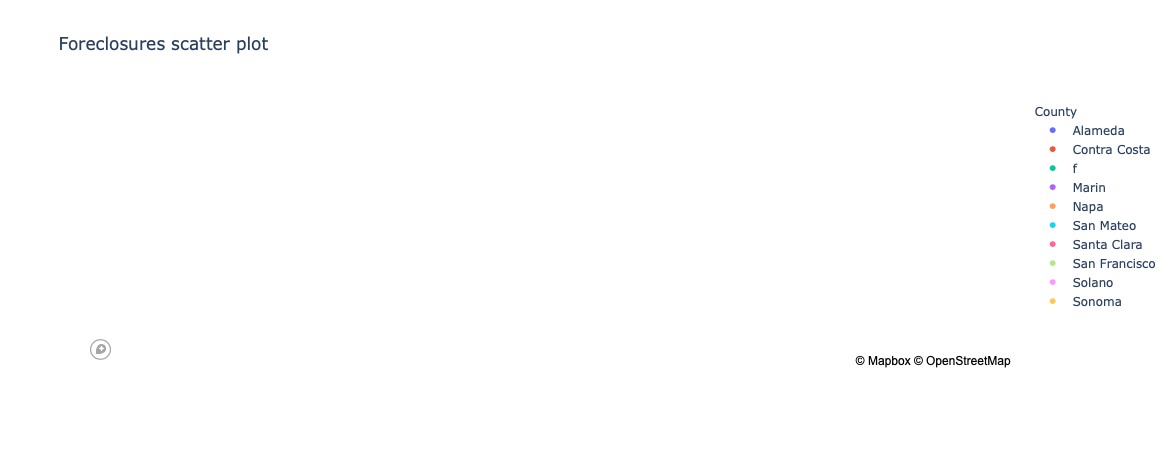

In [53]:
# Create the Mapbox Scatter plot based on the most_foreclosures_df DataFrame.
# The color parameter should be based on County
px.scatter_mapbox(
foreclosure_df,
    lat='Latitude',
    lon='Longitude',
    zoom=8,
    title='Foreclosures scatter plot',
    color='County'
)

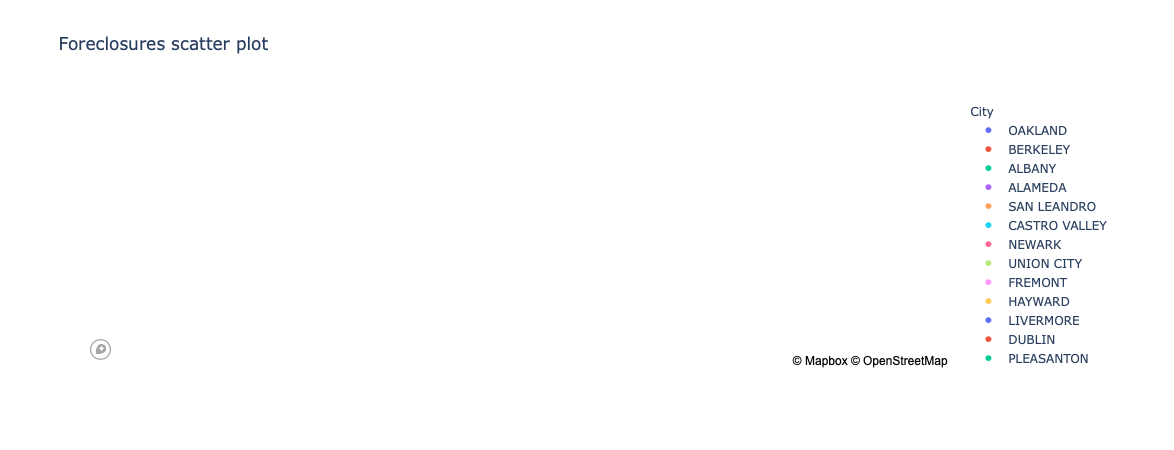

In [50]:
# Create the Mapbox Scatter plot based on the most_foreclosures_df DataFrame.
# The color parameter should be based on city
px.scatter_mapbox(
foreclosure_df,
    lat='Latitude',
    lon='Longitude',
    zoom=8,
    title='Foreclosures scatter plot',
    color='City',
)

In [54]:
# Create the Mapbox Scatter plot based on the most_foreclosures_df DataFrame.
# The color parameter should be based on city
px.scatter_mapbox(
foreclosure_df,
    lat='Latitude',
    lon='Longitude',
    zoom=8,
    title='Foreclosures scatter plot',
    color='Owner Occ',
)

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['County', 'Address', 'City', 'Sq Ft', 'Beds', 'Baths', 'Est Value', 'Est Equity', 'Owner', 'Owner Occ?', 'Listed for Sale?', 'Foreclosure', 'Concatenated Address', 'Latitude', 'Longitude'] but received: Owner Occ